In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
data = pd.read_csv("QWE.csv")

In [2]:
data.head(10)

,ID,Customer Age (in months),Age Category,Churn,CHI Score Month 0,CHI Score 0-1,Support Cases Month 0,Support Cases 0-1,SP Month 0,SP 0-1,Logins 0-1,Blog Articles 0-1,Views 0-1,Days Since Last Login 0-1
0,1,67.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0
1,2,67.0,3,NaN,62.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,-16.0,31.0
2,3,55.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0
3,4,63.0,3,NaN,231.0,1.0,1.0,-1.0,3.0,NaN,167.0,-8.0,21996.0,NaN
4,5,57.0,3,NaN,43.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,31.0
5,6,58.0,3,NaN,138.0,-10.0,NaN,NaN,NaN,NaN,43.0,NaN,-33.0,NaN
6,7,57.0,3,NaN,180.0,-5.0,1.0,1.0,3.0,3.0,13.0,-1.0,907.0,NaN
7,8,46.0,3,NaN,116.0,-11.0,NaN,NaN,NaN,NaN,NaN,NaN,38.0,6.0
8,9,56.0,3,NaN,78.0,-7.0,1.0,-2.0,3.0,NaN,-9.0,1.0,NaN,7.0
9,10,56.0,3,NaN,78.0,-37.0,NaN,NaN,NaN,NaN,-7.0,NaN,30.0,14.0


In [3]:
data.drop(['ID'], axis=1, inplace=True)

In [4]:
data = data.fillna(0)

In [5]:
data['Churn'].value_counts()

0.0    6024
1.0     323
Name: Churn, dtype: int64

In [6]:
# os = SMOTE(random_state=0)
# X = data.drop(["Churn"],axis=1)
# Y = data["Churn"].values
# from sklearn.model_selection import train_test_split
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
# os_data_X,os_data_y=os.fit_sample(X_train,Y_train)

# os_data_X = pd.DataFrame(data=os_data_X,columns=X_train.columns )
# os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])

In [7]:
first = data[data["Age Category"]==1]
second = data[data["Age Category"]==2]
third = data[data["Age Category"]==3]

In [8]:
first.drop(['Age Category'], axis=1, inplace =True)
second.drop(['Age Category'], axis=1, inplace = True)
third.drop(['Age Category'], axis =1, inplace = True)

In [9]:
os = SMOTE(random_state=0)
y = first["Churn"].values
X = first.drop(labels = ["Churn"],axis = 1)
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

os_data_X,os_data_y=os.fit_sample(X_train,y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=X_train.columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])

In [10]:
#building the model & printing the score
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(os_data_X, os_data_y)  
predictions = classifier.predict(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000)
result = model.fit(os_data_X, os_data_y)

In [12]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       400
         1.0       0.00      0.00      0.00        11

    accuracy                           0.96       411
   macro avg       0.49      0.49      0.49       411
weighted avg       0.95      0.96      0.95       411

0.9586374695863747


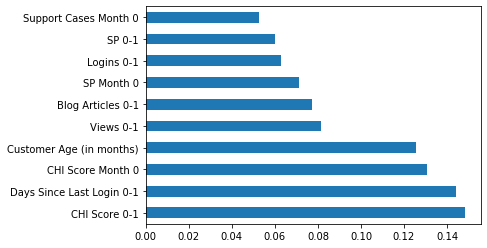

In [13]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [14]:
customerlist = pd.DataFrame({'predictions':predictions,
                             'observations':y_test,
                             'probability':classifier.predict_proba(X_test)[:,1]})

In [15]:
list1 = customerlist.sort_values("probability", axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(100)

In [23]:
list1

,predictions,observations,probability
274,1.0,0.0,0.800
249,1.0,0.0,0.635
126,1.0,0.0,0.635
314,1.0,0.0,0.610
285,1.0,0.0,0.550
134,1.0,0.0,0.505
221,0.0,1.0,0.480
21,0.0,0.0,0.475
282,0.0,0.0,0.465
380,0.0,0.0,0.465


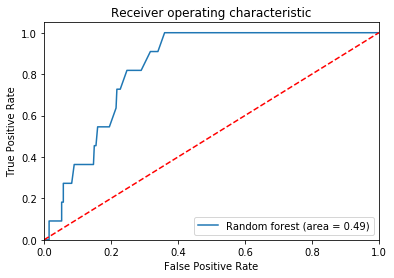

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC1')
plt.show()

In [17]:
y = second["Churn"].values
X = second.drop(labels = ["Churn"],axis = 1)
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
os_data_X,os_data_y=os.fit_sample(X_train,y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=X_train.columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])

In [18]:
#building the model & printing the score
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(os_data_X, os_data_y)  
predictions = classifier.predict(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000)
result = model.fit(os_data_X, os_data_y)

In [20]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       355
         1.0       0.39      0.35      0.37        26

    accuracy                           0.92       381
   macro avg       0.67      0.65      0.66       381
weighted avg       0.91      0.92      0.92       381

0.9186351706036745


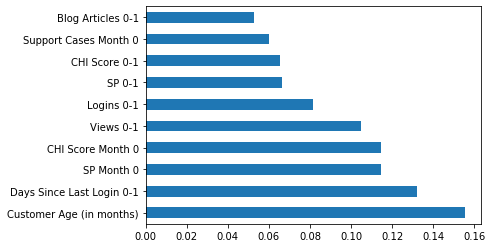

In [21]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [24]:
customerlist = pd.DataFrame({'predictions':predictions,
                             'observations':y_test,
                             'probability':classifier.predict_proba(X_test)[:,1]})

In [25]:
list2 = customerlist.sort_values("probability", axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(100)

In [26]:
list2

,predictions,observations,probability
125,1.0,1.0,0.980768
328,1.0,1.0,0.980768
50,1.0,1.0,0.980768
65,1.0,1.0,0.950000
132,1.0,1.0,0.920000
68,1.0,1.0,0.820000
17,1.0,0.0,0.805000
111,1.0,0.0,0.750000
306,1.0,0.0,0.670000
315,1.0,0.0,0.635000


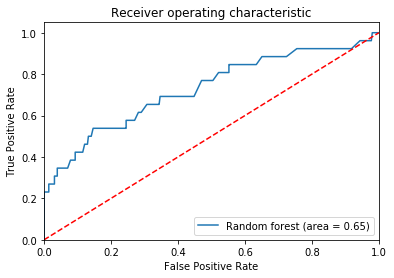

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC2')
plt.show()

In [28]:
y = third["Churn"].values
X = third.drop(labels = ["Churn"],axis = 1)
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
os_data_X,os_data_y=os.fit_sample(X_train,y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=X_train.columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])

In [29]:
#building the model & printing the score
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(os_data_X, os_data_y)  
predictions = classifier.predict(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000)
result = model.fit(os_data_X, os_data_y)

In [31]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       451
         1.0       0.29      0.25      0.27        28

    accuracy                           0.92       479
   macro avg       0.62      0.61      0.61       479
weighted avg       0.92      0.92      0.92       479

0.9206680584551148


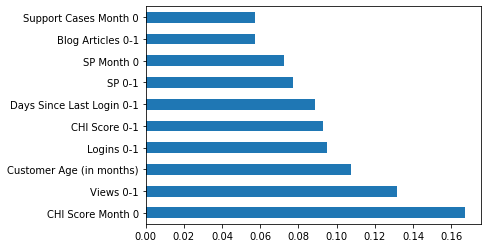

In [32]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [33]:
customerlist = pd.DataFrame({'predictions':predictions,
                             'observations':y_test,
                             'probability':classifier.predict_proba(X_test)[:,1]})

In [34]:
list3 = customerlist.sort_values("probability", axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(100)

In [35]:
list3

,predictions,observations,probability
351,1.0,1.0,1.000000
301,1.0,1.0,0.920000
289,1.0,1.0,0.910000
238,1.0,0.0,0.905000
106,1.0,1.0,0.869167
299,1.0,0.0,0.817321
456,1.0,0.0,0.815000
44,1.0,0.0,0.800000
187,1.0,0.0,0.795000
10,1.0,1.0,0.750000


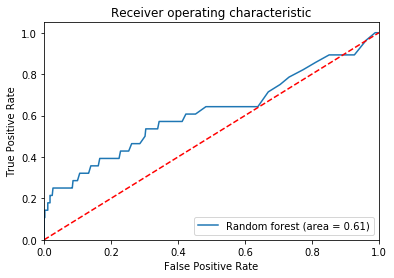

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC3')
plt.show()

In [37]:
full = list1.append(list2).append(list3)

In [38]:
full.sort_values("probability", axis = 0, inplace=False, ascending = False, kind = "quicksort", na_position="last").head(100).to_csv('top100.csv')

In [39]:
full

,predictions,observations,probability
274,1.0,0.0,0.800
249,1.0,0.0,0.635
126,1.0,0.0,0.635
314,1.0,0.0,0.610
285,1.0,0.0,0.550
134,1.0,0.0,0.505
221,0.0,1.0,0.480
21,0.0,0.0,0.475
282,0.0,0.0,0.465
380,0.0,0.0,0.465
